In [31]:
import pandas as pd

# Define the full file path
file_path = 'data/0-data/events-US-1980-2023.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, skiprows=1)

# Display the first few rows of the DataFrame
df.head()


,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2650.4,7
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2153.6,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,39178.2,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2002.0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1360.8,20


In [32]:
# Reset the index to set proper column names
df = df.reset_index()

# Get basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   index                                          360 non-null    int64  
 1   Name                                           360 non-null    object 
 2   Disaster                                       360 non-null    object 
 3   Begin Date                                     360 non-null    int64  
 4   End Date                                       360 non-null    int64  
 5   Total CPI-Adjusted Cost (Millions of Dollars)  360 non-null    float64
 6   Deaths                                         360 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.8+ KB


In [33]:
# Get summary statistics of numeric columns
df.describe()


,index,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths
count,360.000000,3.600000e+02,3.600000e+02,360.000000,360.000000
mean,179.500000,2.008460e+07,2.008480e+07,7154.461667,44.327778
std,104.067286,1.179201e+05,1.178194e+05,17940.846831,205.644685
min,0.000000,1.980041e+07,1.980042e+07,1000.000000,0.000000
25%,89.750000,1.999782e+07,1.999782e+07,1548.875000,0.000000
50%,179.500000,2.011086e+07,2.011097e+07,2372.850000,6.000000
75%,269.250000,2.018072e+07,2.018083e+07,4820.325000,27.000000
max,359.000000,2.023061e+07,2.023061e+07,193795.700000,2981.000000


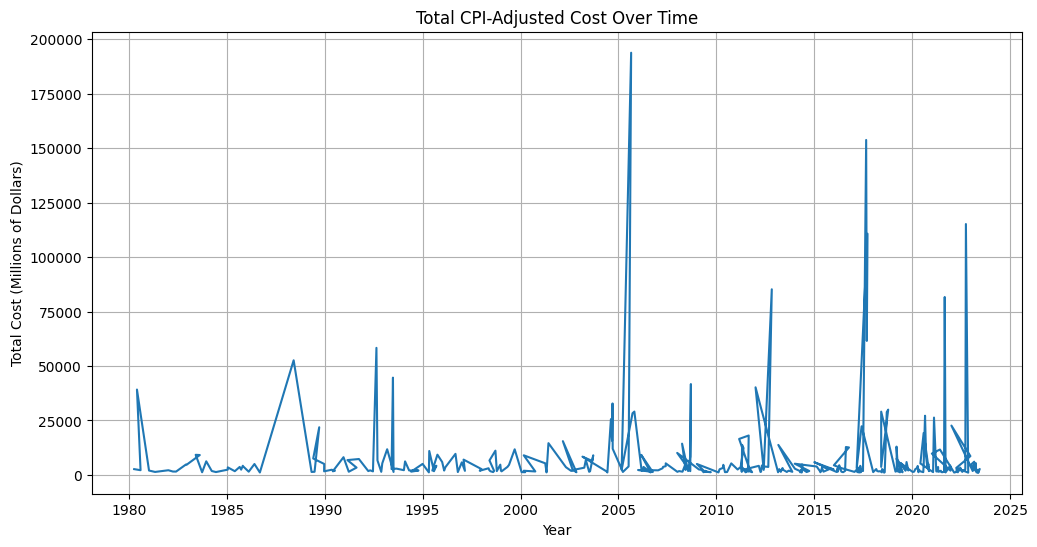

In [34]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
df['Begin Date'] = pd.to_datetime(df['Begin Date'], format='%Y%m%d')
df['End Date'] = pd.to_datetime(df['End Date'], format='%Y%m%d')

# Plot Total CPI-Adjusted Cost over time
plt.figure(figsize=(12, 6))
plt.plot(df['Begin Date'], df['Total CPI-Adjusted Cost (Millions of Dollars)'])
plt.title('Total CPI-Adjusted Cost Over Time')
plt.xlabel('Year')
plt.ylabel('Total Cost (Millions of Dollars)')
plt.grid(True)
plt.show()



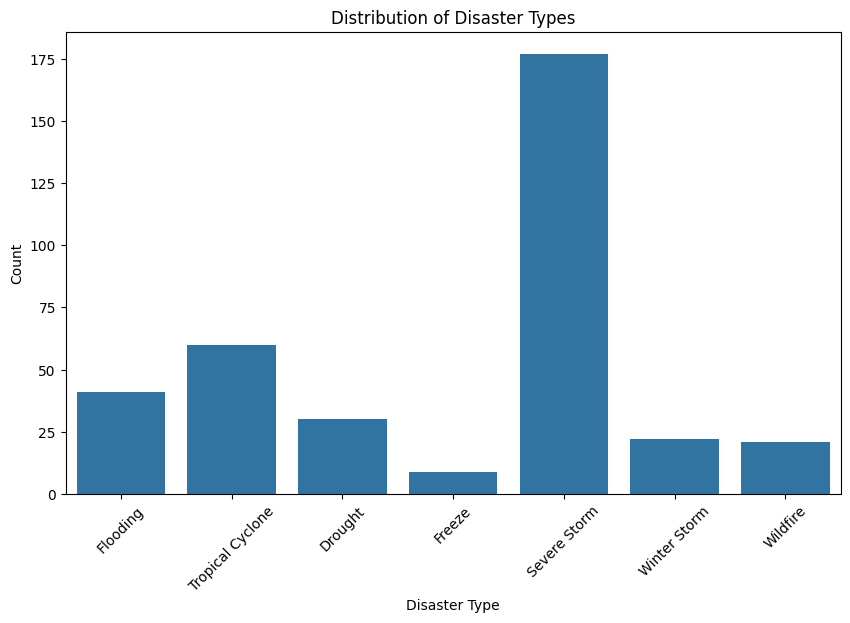

In [35]:
import seaborn as sns

# Create a bar chart for disaster types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Disaster')
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

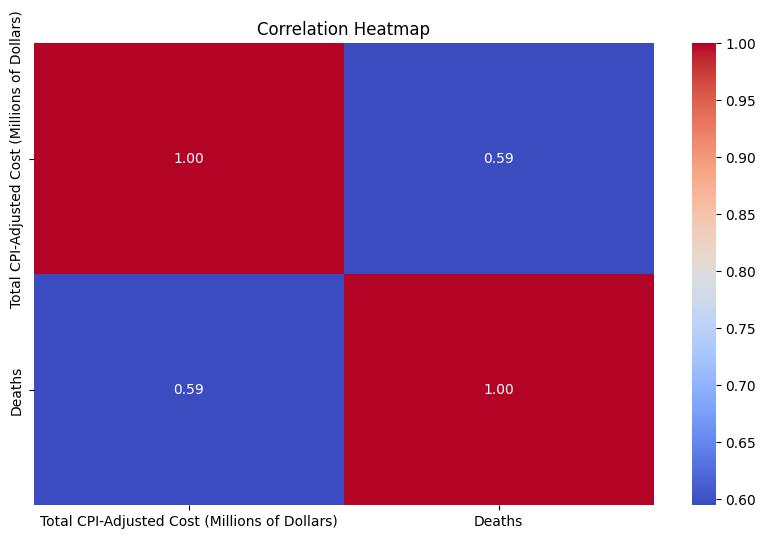

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns of interest
numeric_columns = ['Total CPI-Adjusted Cost (Millions of Dollars)', 'Deaths']

# Create a subset of the DataFrame with only numeric columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
# Generating a heatmap showing the correlation between the "Total CPI-Adjusted Cost" and "Deaths" columns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


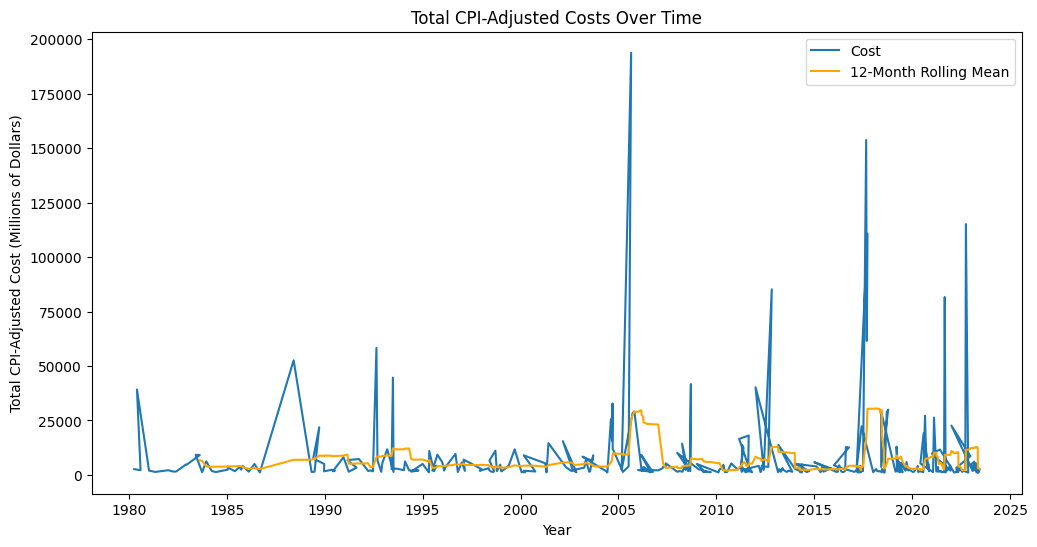

In [37]:
# Plot a time series of Total CPI-Adjusted Costs over the years,
# and overlay it with a rolling mean or median to smooth out trends.
import matplotlib.pyplot as plt

# Calculate rolling mean of Total CPI-Adjusted Costs
df['Total CPI-Adjusted Cost (Millions of Dollars)'] = pd.to_numeric(df['Total CPI-Adjusted Cost (Millions of Dollars)'], errors='coerce')
rolling_mean = df.groupby('Begin Date')['Total CPI-Adjusted Cost (Millions of Dollars)'].mean().rolling(window=12).mean()

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Begin Date'], df['Total CPI-Adjusted Cost (Millions of Dollars)'], label='Cost')
plt.plot(rolling_mean.index, rolling_mean.values, label='12-Month Rolling Mean', color='orange')
plt.xlabel('Year')
plt.ylabel('Total CPI-Adjusted Cost (Millions of Dollars)')
plt.title('Total CPI-Adjusted Costs Over Time')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

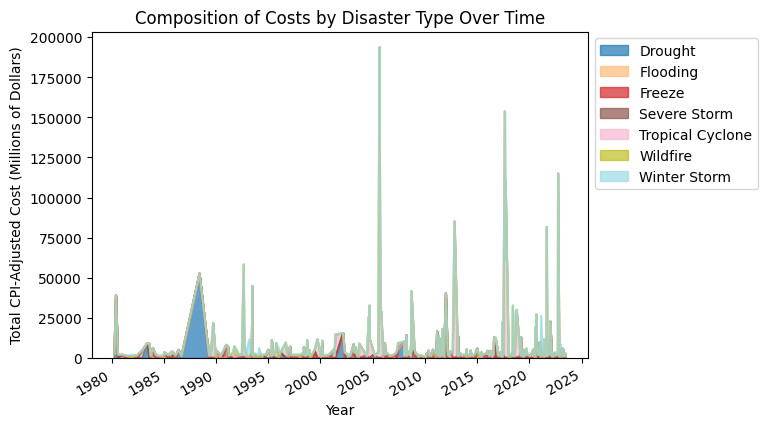

In [38]:
# Composition of Total CPI-Adjusted Costs by Disaster Type over time
import matplotlib.pyplot as plt

# Pivot the data for a stacked area chart
pivot_df = df.pivot(index='Begin Date', columns='Disaster', values='Total CPI-Adjusted Cost (Millions of Dollars)')

# Plot a stacked area chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total CPI-Adjusted Cost (Millions of Dollars)')
plt.title('Composition of Costs by Disaster Type Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


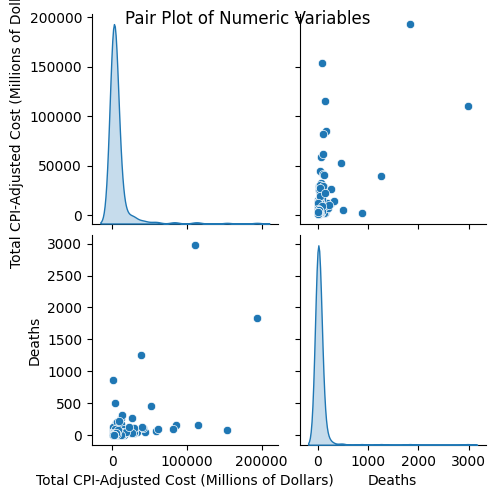

In [39]:
# Pairwise relationships between numeric columns to identify correlations and patterns
import seaborn as sns

# Select numeric columns for the pair plot
numeric_columns = ['Total CPI-Adjusted Cost (Millions of Dollars)', 'Deaths']

# Create a pair plot
sns.pairplot(df[numeric_columns], diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()


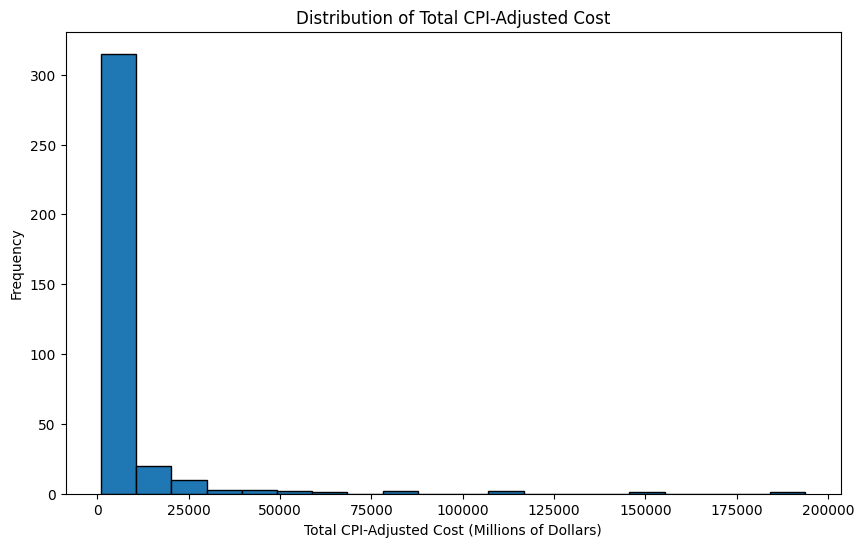

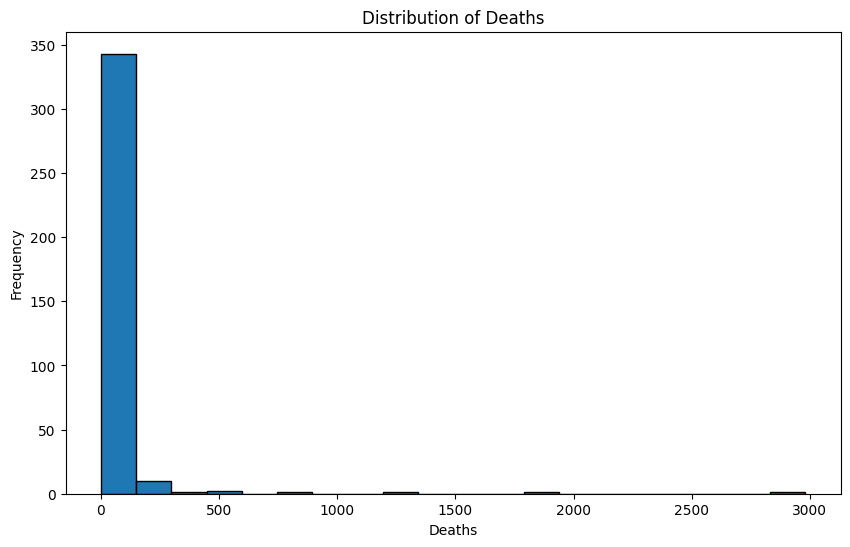

In [40]:
# Histogram for Total CPI-Adjusted Cost
plt.figure(figsize=(10, 6))
plt.hist(df['Total CPI-Adjusted Cost (Millions of Dollars)'], bins=20, edgecolor='k')
plt.xlabel('Total CPI-Adjusted Cost (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Total CPI-Adjusted Cost')
plt.show()

# Histogram for Deaths
plt.figure(figsize=(10, 6))
plt.hist(df['Deaths'], bins=20, edgecolor='k')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Deaths')
plt.show()


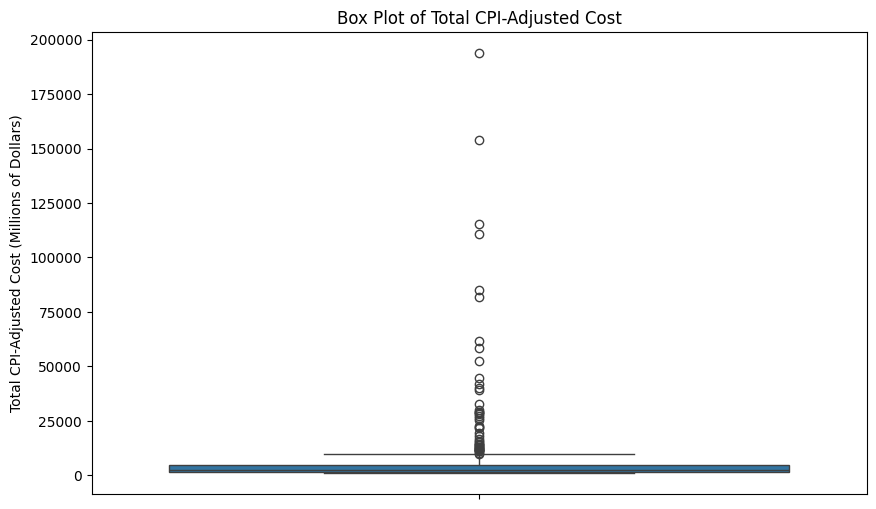

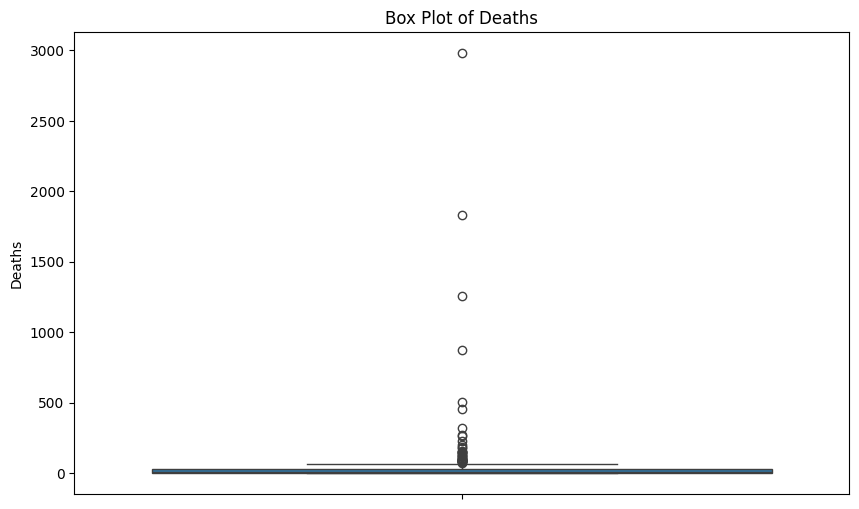

In [41]:
# Box plot for Total CPI-Adjusted Cost
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Total CPI-Adjusted Cost (Millions of Dollars)'])
plt.ylabel('Total CPI-Adjusted Cost (Millions of Dollars)')
plt.title('Box Plot of Total CPI-Adjusted Cost')
plt.show()

# Box plot for Deaths
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Deaths'])
plt.ylabel('Deaths')
plt.title('Box Plot of Deaths')
plt.show()


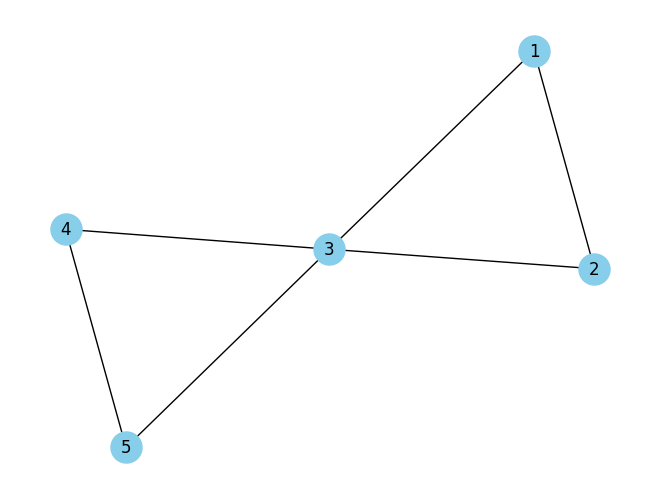

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 3)])

# Draw the graph
pos = nx.spring_layout(G)  # Layout algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
plt.show()


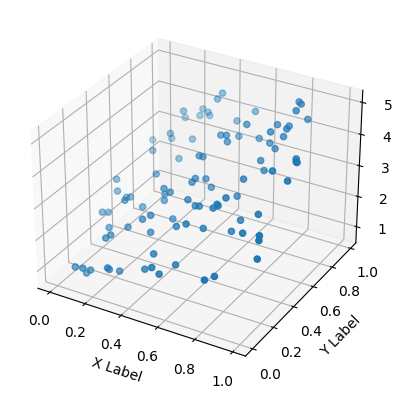

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x = np.random.rand(100)
y = np.random.rand(100)
z = 2 * x + 3 * y + np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Label the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()
